# Name: Tony Jose

### <center> The Sparks Foundation - Task 3

### <center> Predict the optimum number of clusters and represent it visually.

#### Segmentation
- From the standard Iris dataset we need to predict the optimum numbers of clusters that can be formed. 
- We need to visually represent the clusters using the plotting tools.

In [454]:
# Importing the required libraries which will be required for analysis and clustering exercise.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [455]:
# Importing the dataset
df = pd.read_csv('Iris.csv')

In [456]:
# Getting an idea of the dataset by viewing the top 5 records of the dataset.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- As we can see above based on the columns SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm column we can classify the Species into different categories.
- We have following columns in our dataset:
    - Id - This column is identify the datapoint uniquely.
    - SepalLengthCm	- SpealLengthCm is length of the Sepal in centimeters.
    - SepalWidthCm	- SepalWidthCm is width of the Sepal in the Centimeters.
    - PetalLengthCm	- PetalLengthCm is the length of the flowers petals in centimeters.
    - PetalWidthCm	- PetalWidthCm is the width of the flowers petals in centimeters.
    - Species - Species specifies the Specie of the flower. We can use this feature as a dependent feature to classify the flower.

In [457]:
# Shape of the dataset. Here we have 150 records and 6 columns in total.
df.shape

(150, 6)

In [458]:
# Checking for the datatypes and getting an overview of data quality issues like missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [459]:
# Lets get some descriptive statistical information from the dataset for our further analysis.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Figure size 144x144 with 0 Axes>

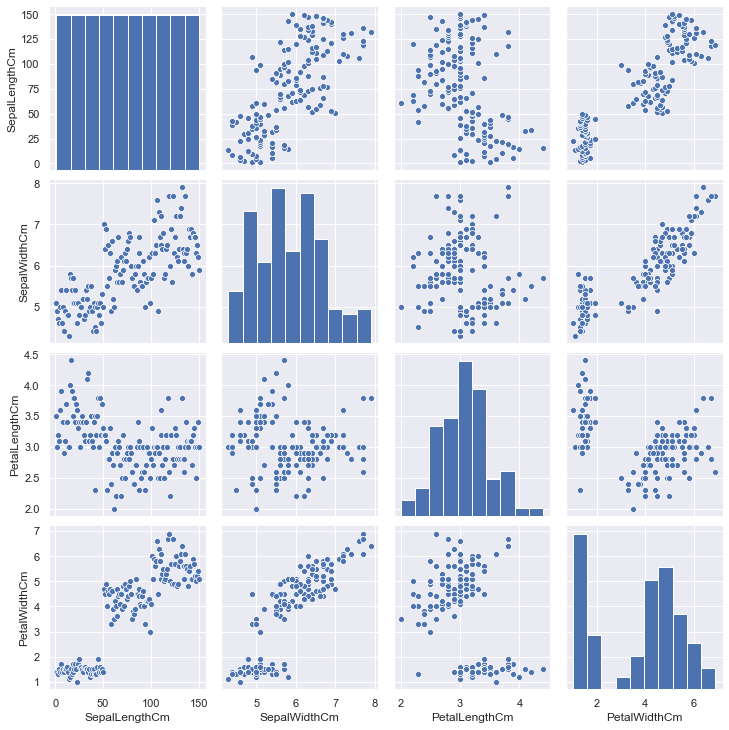

In [460]:
plt.figure(figsize=(2,2))
sns.pairplot(pd.DataFrame(df.iloc[:, [0,1, 2, 3]].values,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']),palette=['brown'])
plt.show()

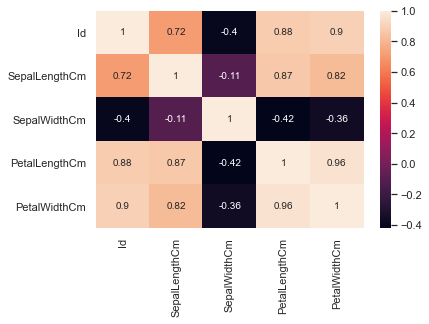

In [461]:
# Lets plot a heatmap to see the correlation betweeen the features.
sns.heatmap(df.corr(), annot=True)
plt.show()

- From the above correlation matrix we can see that the PetalWidthCm and PetalLengthCm are highly correlated with 0.96.

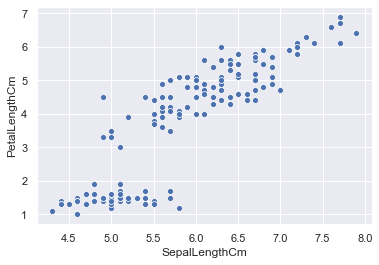

From the scatterplot of SepalLengthCm and PetalLengthCm we can see that there are probably 2 category of species i.e. i. Sepal length < 6.0 and PetalLengthCm < 3.0 and ii. Sepal length > 6.0 and PetalLengthCm > 3.0.Both of these have different trends


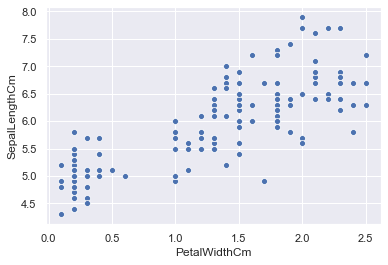

From the scatterplot of PetalWidthCm and SepalLengthCm we can see that there are probably 2 category of species i.e. i. Petal Width < 0.7 and SepalLengthCm < 6.0 and ii. Petal Width > 0.7 and SepalLengthCm > 6.0.Both of these have different trends


In [462]:
sns.set(style="darkgrid",palette='deep',font='sans-serif')
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data = df)
plt.show()
print('From the scatterplot of SepalLengthCm and PetalLengthCm we can see that there are probably 2 category of species i.e. i. Sepal length < 6.0 and PetalLengthCm < 3.0 and ii. Sepal length > 6.0 and PetalLengthCm > 3.0.Both of these have different trends')
sns.set(style="darkgrid",palette='deep',font='sans-serif')
sns.scatterplot(x='PetalWidthCm', y='SepalLengthCm', data = df)
plt.show()
print('From the scatterplot of PetalWidthCm and SepalLengthCm we can see that there are probably 2 category of species i.e. i. Petal Width < 0.7 and SepalLengthCm < 6.0 and ii. Petal Width > 0.7 and SepalLengthCm > 6.0.Both of these have different trends')

### Clustering 

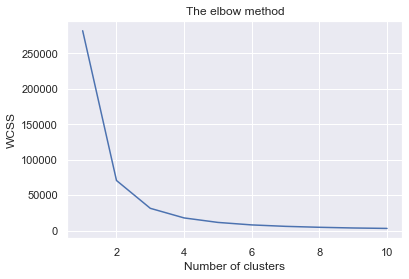

In [463]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.set(style="darkgrid",palette='deep',font='sans-serif')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Lets plot the clusters. 
#### Plotting 3 Clusters.

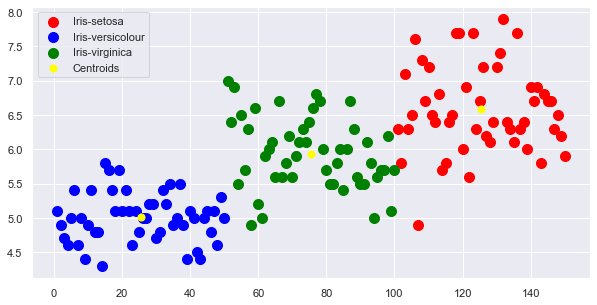

In [464]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# Visualising the clusters - On the first two columns
sns.set(style="darkgrid",palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

- Here we can see the Species are getting clustered properly and we can identify each of them separately.

#### Plotting 4 Clusters.

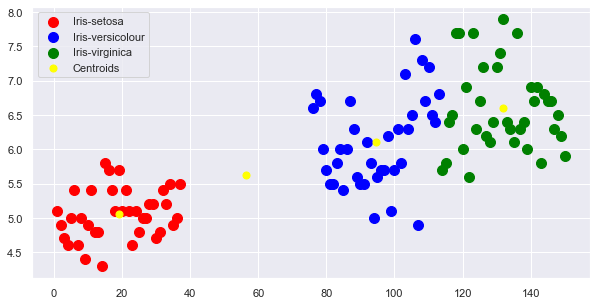

In [465]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
sns.set(style="darkgrid",palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

- As we can see above after plotting 4 clusters one of the group remains empty and we can see that the clusters are not accurate.

#### Plotting 2 Clusters.

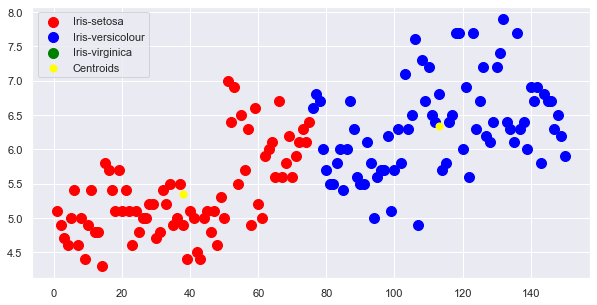

In [466]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
sns.set(style="darkgrid",palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

- While plotting 2 clusters is not giving clear picture about the data. It has mixed one of the clusters into 2 groups and thus we cant distinguish the 3 clusters separately.

##### So from above analysis we can see that there should be atleast 3 clusters to distinctly identify the Species as we can see in the plot with 3 cluster above.

### <center> Thank You! <center>